In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import (
    boxplot, show, title, xticks, ylabel, figure, subplot, ylim, xlabel, hist, colorbar, imshow,cm,colorbar,plot,yticks,legend
)
from scipy.stats import zscore

df = pd.read_csv('D:/课件/data mining/data/short_parsed_output_7.csv')
WhiteTimes = df['WhiteTimes'].apply(eval)
SumW = []
for i in range(len(WhiteTimes)):
    total_sum = sum(WhiteTimes[i])
    SumW.append(total_sum)

BlackTimes = df['BlackTimes'].apply(eval)
SumB = []
for i in range(len(BlackTimes)):
    total_sum = sum(BlackTimes[i])
    SumB.append(total_sum)
gamelenarray = np.array(SumW)+np.array(SumB)
name = ['Gamelength']
gamelen = pd.DataFrame(gamelenarray,columns =name)

EloDifference = df['WhiteElo'] - df['BlackElo']
name = ['EloDifference']
Elodif = pd.DataFrame(EloDifference,columns =name)

result = df['Result']
resultnames = np.unique(result)
resultDict=dict(zip(resultnames,range(len(resultnames)))) 
resultarray = np.array([resultDict[cl] for cl in result]) 
name = ['Result'] 
Result = pd.DataFrame(resultarray,columns =name) 

dfin = df[['WhiteElo', 'BlackElo','Middlegame', 'Endgame']] 
df = pd.concat([dfin, gamelen,Result,Elodif], axis=1)  
# name for final dataframe df


FileNotFoundError: [Errno 2] No such file or directory: 'D:/课件/data mining/data/short_parsed_output_7.csv'

In [4]:
n,m = df.shape
X = np.empty((n,m))
for i in range((m)):
    X[:,i] = df.iloc[:,i]
X= np.delete(X, 5, axis=1)

attributeNames = df.iloc[0,:][df.iloc[0,:]!='Result']
y=np.asarray(df['Result'])
column_titles = df.columns.tolist()
classNames =["Black Win","White Win","Draw"]
attributeNames = [col for col in df.columns if col != 'Result']
M = len(attributeNames)
C = len(classNames)
N=len(y)

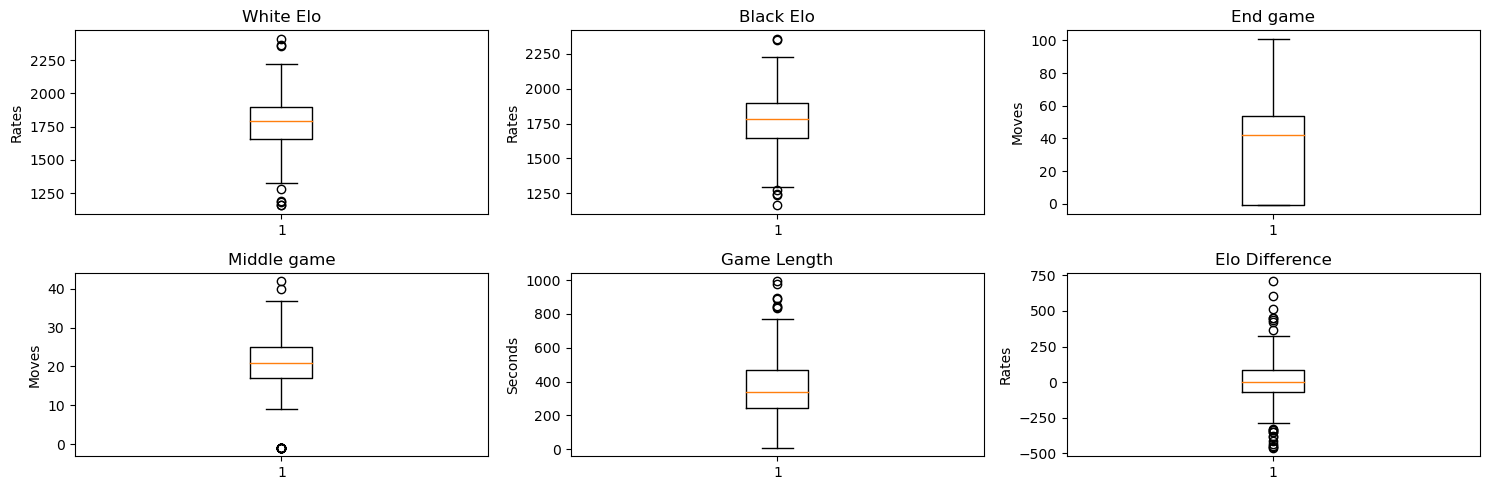

In [6]:
#boxplot
fig, axs = plt.subplots(2, 3, figsize=(15, 5))  # 


axs[0,0].boxplot(df['WhiteElo'])
axs[0,0].set_title('White Elo')
axs[0,0].set_ylabel('Rates')

axs[0,1].boxplot(df['BlackElo'])
axs[0,1].set_title('Black Elo')
axs[0,1].set_ylabel('Rates')

axs[1,1].boxplot(df['Gamelength'])
axs[1,1].set_title('Game Length')
axs[1,1].set_ylabel('Seconds')

axs[1,0].boxplot(df['Middlegame'])
axs[1,0].set_title('Middle game')
axs[1,0].set_ylabel('Moves')

axs[0,2].boxplot(df['Endgame'])
axs[0,2].set_title('End game')
axs[0,2].set_ylabel('Moves')

axs[1,2].boxplot(df['EloDifference'])
axs[1,2].set_title('Elo Difference')
axs[1,2].set_ylabel('Rates')

plt.tight_layout()
plt.show()


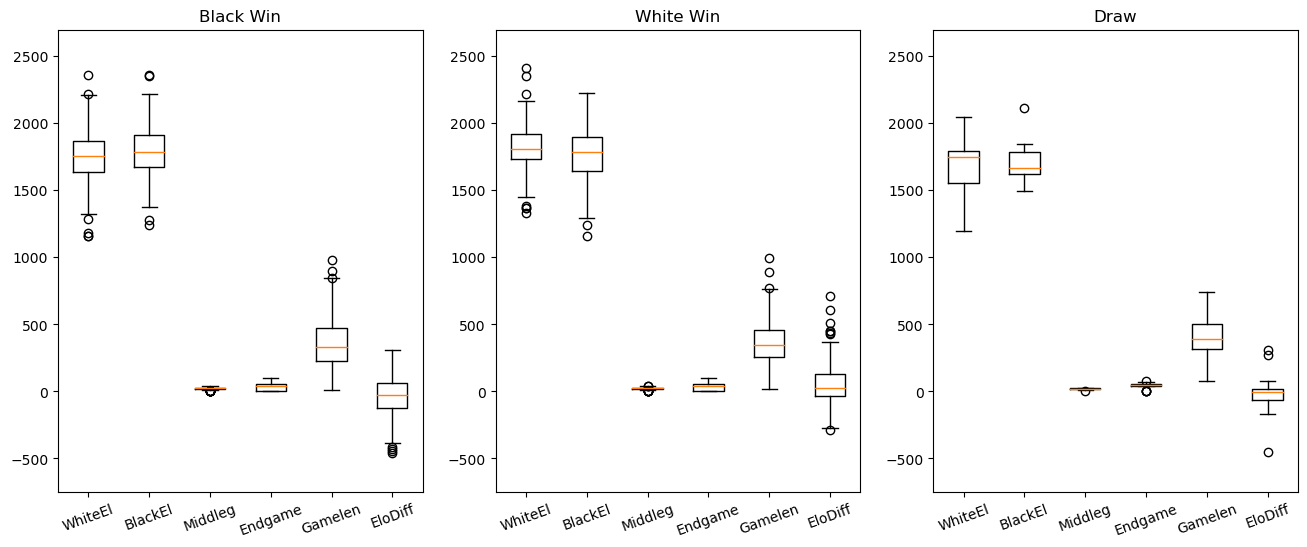

In [7]:
#Multi-boxplot

figure(figsize=(16, 6))
for c in range(3):
    subplot(1, 3, c + 1)
    class_mask = y == c  # binary mask to extract elements of class c

    boxplot(X[class_mask, :])
    title(classNames[c])
    xticks(
        range(1, len(attributeNames) + 1), [a[:7] for a in attributeNames], rotation=20
    )
    y_up = X.max() + (X.max() - X.min()) * 0.1
    y_down = X.min() - (X.max() - X.min()) * 0.1
    ylim(y_down, y_up)

show()


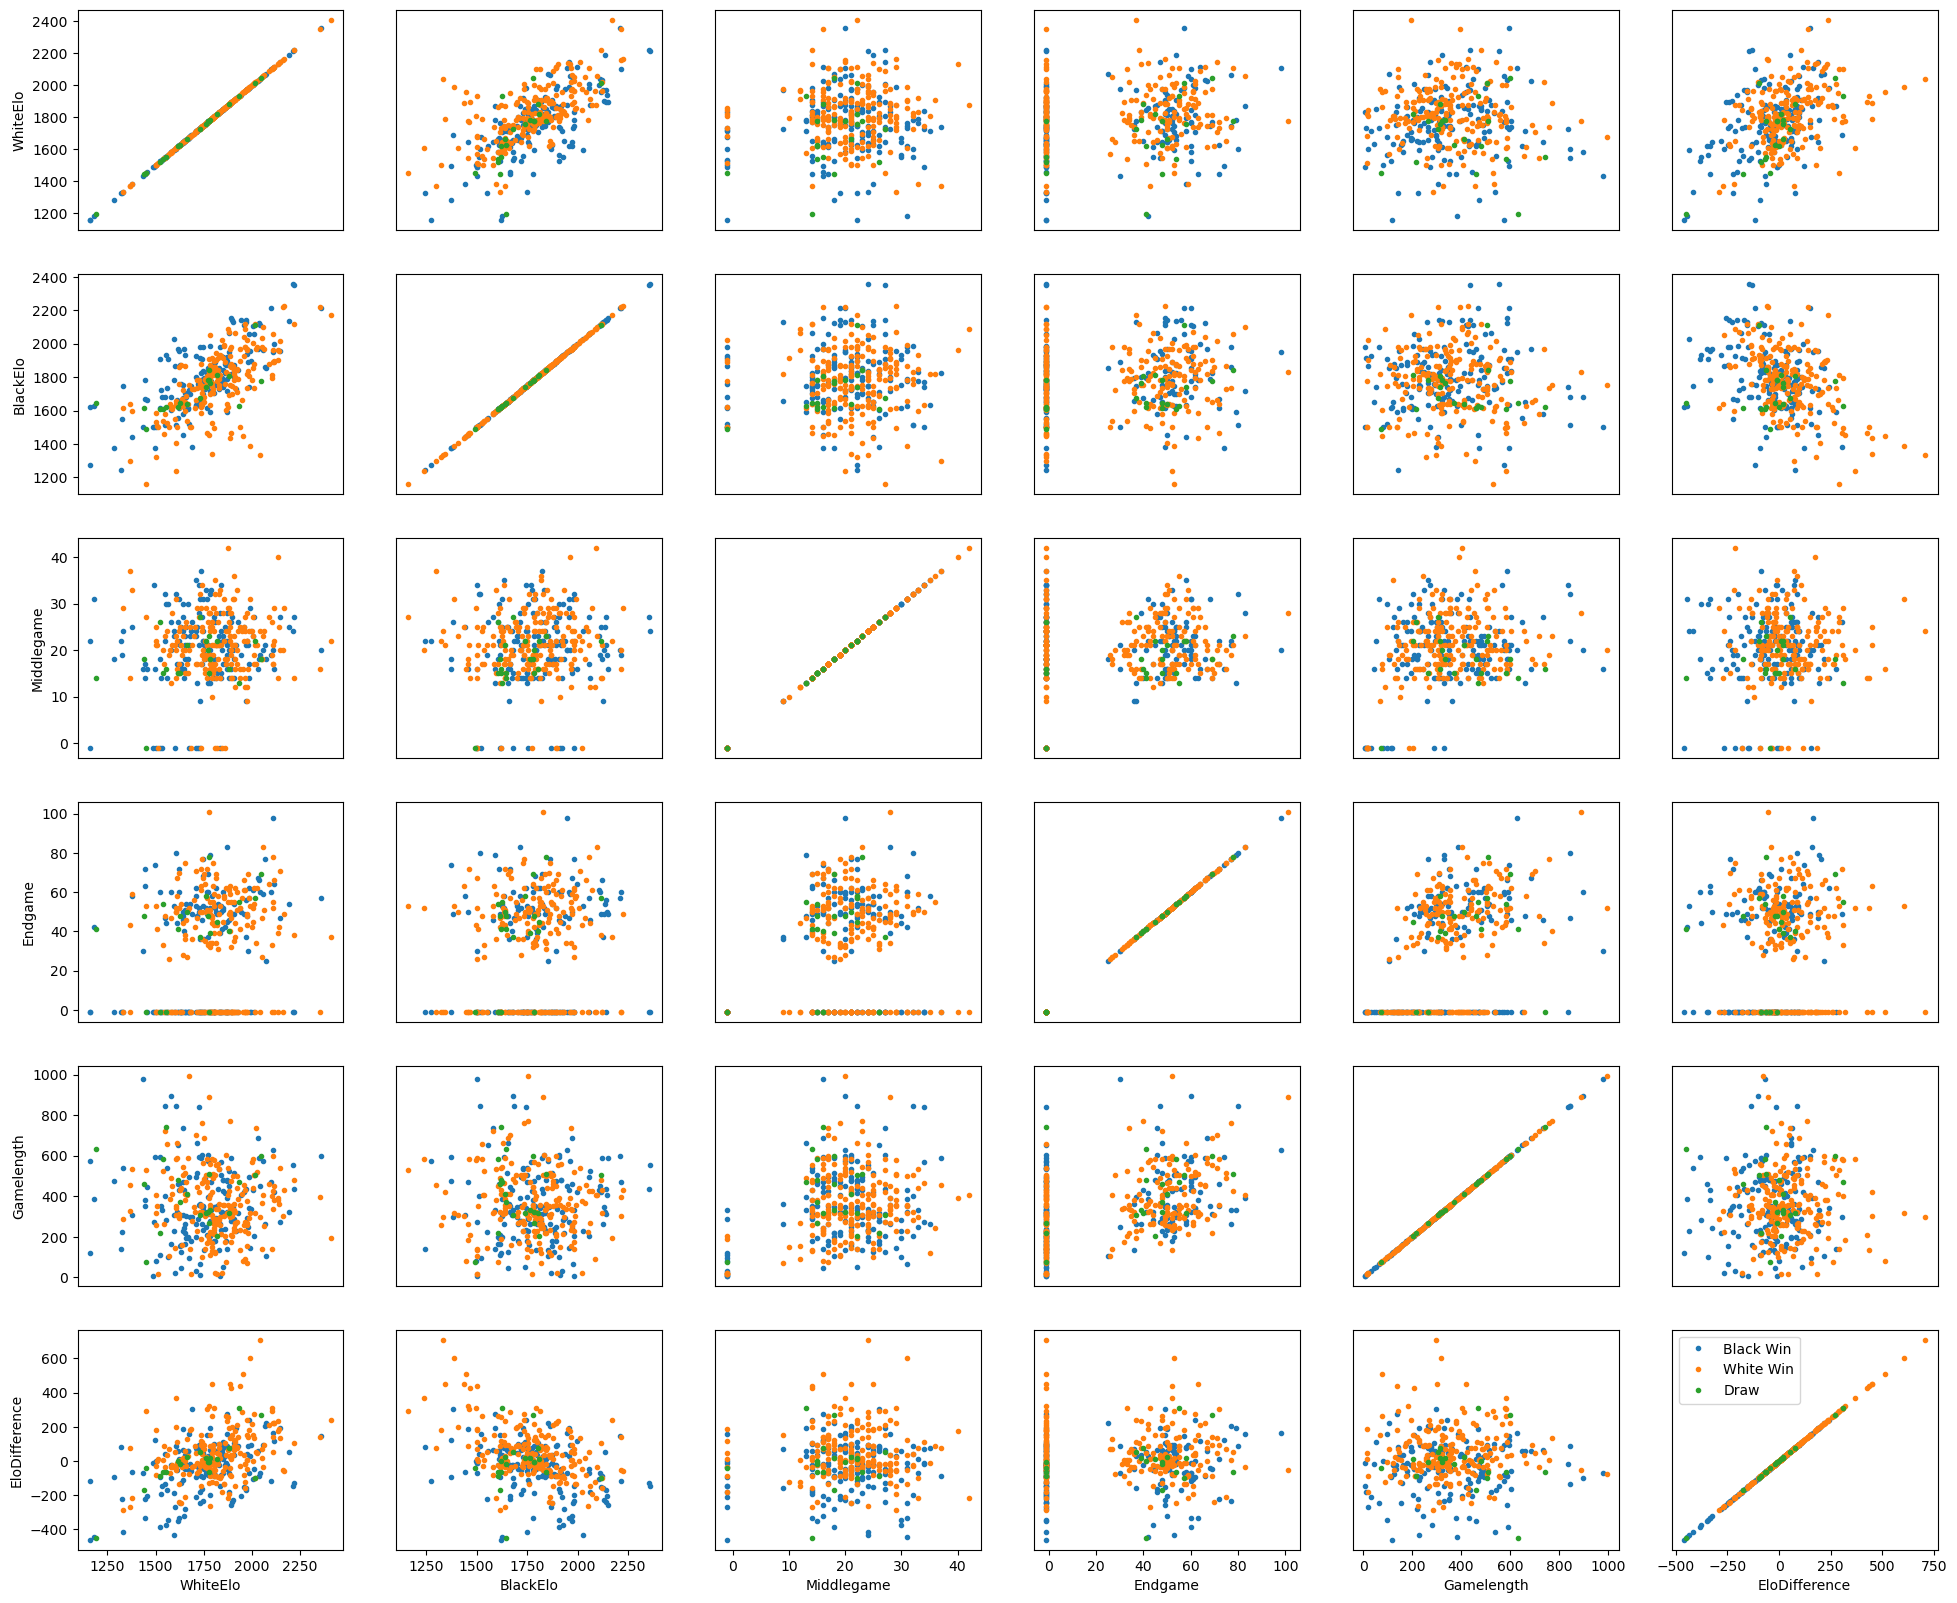

In [8]:
#dot-plot
figure(figsize=(24, 20))
for m1 in range(M):
    for m2 in range(M):
        subplot(M, M, m1 * M + m2 + 1)
        for c in range(C):
            class_mask = y == c
            plot(np.array(X[class_mask, m2]), np.array(X[class_mask, m1]), ".")
            if m1 == M - 1:
                xlabel(attributeNames[m2])
            else:
                xticks([])
            if m2 == 0:
                ylabel(attributeNames[m1])
            else:
                yticks([])
legend(classNames)
plt.savefig('boxplot_example.jpg', dpi=512, bbox_inches='tight') 

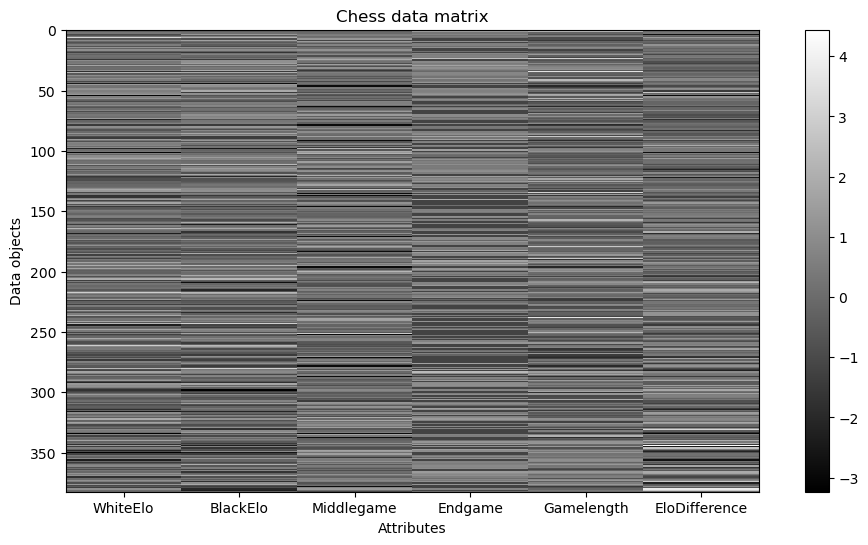

In [9]:
# all attributes
X_standarized = zscore(X, ddof=1)
figure(figsize=(12, 6))
imshow(X_standarized, interpolation="none", aspect=(4.0 / N), cmap=cm.gray)
xticks(range(6), attributeNames)
xlabel("Attributes")
ylabel("Data objects")
title("Chess data matrix")
colorbar()
show()



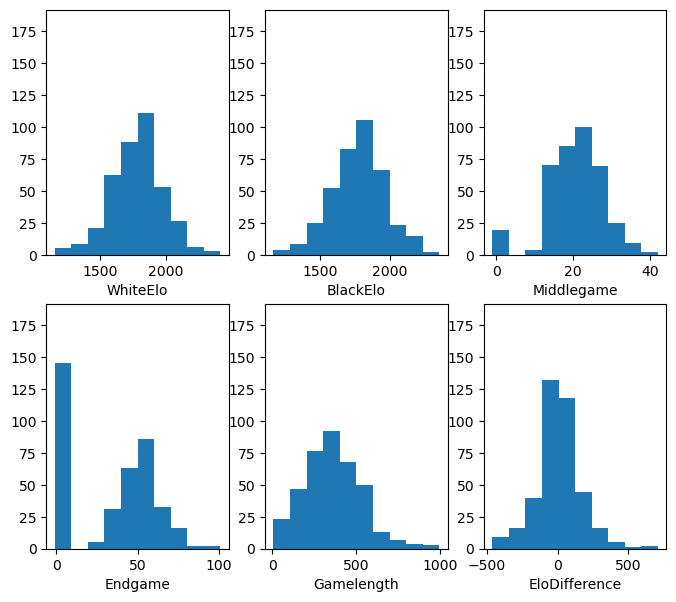

In [10]:
#histogram

figure(figsize=(8, 7))
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
for i in range(M):
    subplot(int(u), int(v), i + 1)
    hist(X[:, i])
    xlabel(attributeNames[i])
    ylim(0, N / 2)
show()
